<a href="https://colab.research.google.com/github/shchoi98/ADS_public/blob/main/analyse_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import plotly.express as px
import scipy.stats as stats
import re
from google.colab import drive
drive.mount('/content/drive')

# DTW
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install fastdtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import data

In [ ]:
# read CSV
path = "drive/MyDrive/Colab Notebooks/ADS/USdata/"
df_tweet_US = pd.read_csv(path +"df_tweet_US.csv")
df_opinion_US = pd.read_csv(path + "df_opinion_US.csv")

In [ ]:
# type conversion
df_tweet_US['created_at'] = pd.to_datetime(df_tweet_US['created_at'])
USsentimentPerDay_Bert = df_tweet_US.resample('D', on='created_at')['sentiment'].mean()
type(df_tweet_US['created_at'])


pandas.core.series.Series

Sentiment on the US leader is generically negative even they got to switch it from Trump to Biden.

Only a few day seems to have positive represent on Biden.

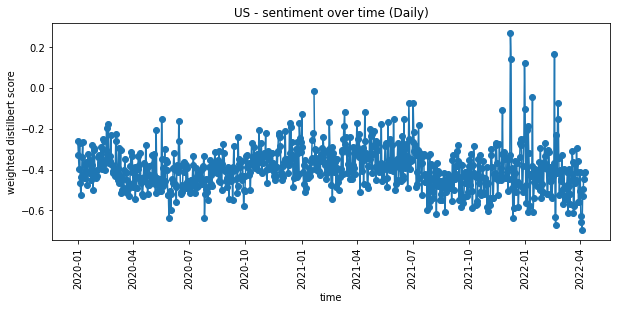

In [ ]:
USsentimentPerDay_Bert = df_tweet_US.resample('D', on='created_at')['sentiment'].mean()

fig, ax = plt.subplots(figsize=(10, 4), sharey=True)

# plot opinion poll
plt.plot(USsentimentPerDay_Bert.index, USsentimentPerDay_Bert)
plt.scatter(USsentimentPerDay_Bert.index, USsentimentPerDay_Bert)
plt.title("US - sentiment over time (Daily)")
plt.xlabel("time")
plt.ylabel("weighted distilbert score")
#plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

Let's see what Biden done right 

In [ ]:
USsentimentPerDay_Bert

created_at
2020-01-01   -0.258458
2020-01-02   -0.328286
2020-01-03   -0.397255
2020-01-04   -0.271234
2020-01-05   -0.468208
                ...   
2022-04-05   -0.529744
2022-04-06   -0.494776
2022-04-07   -0.418918
2022-04-08   -0.445505
2022-04-09   -0.414044
Freq: D, Name: sentiment, Length: 830, dtype: float64

In [ ]:
# return index of the dates when Biden got positive

positive_tweet_dates = USsentimentPerDay_Bert.loc[USsentimentPerDay_Bert> 0 ]
positive_tweet_dates
# created_at
# 2021-12-08    0.271668
# 2021-12-09    0.142502
# 2021-12-31    0.124295
# 2022-02-18    0.168248
# Name: sentiment, dtype: float64

created_at
2021-12-08    0.271668
2021-12-09    0.142502
2021-12-31    0.124295
2022-02-18    0.168248
Name: sentiment, dtype: float64

# filter tweets by term

In [ ]:
# as function:
def weeklyFrequencyAnalysis(df,label_add,ax):
  
    # type conversion
    df['created_at'] = pd.to_datetime(df['created_at'])

    times = df['created_at']
    df_time = times.to_frame()
    df_time["1s"] = 1
    countsPerWeek = df_time.resample('W', on='created_at')['1s'].sum()

    # print("Summary of tweet counts per week: ")
    # print(countsPerWeek.describe())
    
    ax.plot(countsPerWeek.index, countsPerWeek, label = "raw - " + label_add)
    # ax.plot(countsPerWeek.index, countsPerWeek.rolling(4, center = True).mean(), label = "rolling average")
    ax.legend(loc="upper center")
    # ax.set_xticklabels(countsPerWeek.index, rotation=90)
    # ax.set_title("number of tweets per week")
  

In [ ]:
# get some random tweets
# target = '2020-01-01'
n = 9229
earliest = '2021-12-01'
latest = '2022-01-31'

# get a dataframe of tweets that lie in the window
df_tweets_trump_inWindow = df_us_tweets[(df_us_tweets['created_at'] > earliest) & (df_us_tweets['created_at'] < latest)].reset_index()
numInWindow = len(df_tweets_trump_inWindow.index)
print("Number of tweets in window: " + str(numInWindow))

n = min(n, numInWindow)
indices = np.random.choice(range(n), size = n, replace = False)

k = 0
for i in indices:
  if df_tweets_trump_inWindow['distilbert_label'][i].astype('str')== "1.0":
    # print("tweet id: " + str(df_tweets_trump_inWindow['text'][i]) + "\n" + df_tweets_trump_inWindow['distilbert_label'][i].astype('str'))
    k +=1
print(f'k is {k}')



NameError: ignored

In [ ]:
term = 'Poll'
df_us_tweets_filtered = df_us_tweets[(df_us_tweets['text'].str.contains(term)) == True].reset_index()
weeklyFrequencyAnalysis(df_us_tweets_filtered,"us",ax)

plt.tight_layout()
plt.show()

In [ ]:
# term = 'Omicron|COVID|covid'
term = 'AUKUS'
# term = 'Hurricane'
plt.figure(figsize=(14, 7))
plt.title("number of tweets per week")
df_us_tweets_filtered = df_us_tweets[(df_us_tweets['text'].str.contains(term)) == True].reset_index()
df_uk_tweets_filtered = df_uk_tweets[(df_uk_tweets['text'].str.contains(term)) == True].reset_index()
df_au_tweets_filtered = df_au_tagged_tweets[(df_au_tagged_tweets['text'].str.contains(term)) == True].reset_index()
# df_ca_tweets_filtered = df_ca_tweets[(df_ca_tweets['text'].str.contains(term)) == True].reset_index()
# df_nz_tweets_filtered = df_nz_tagged_tweets[(df_nz_tagged_tweets['text'].str.contains(term)) == True].reset_index()
ax = plt.subplot2grid((3, 1), (0, 0))
ax1 = plt.subplot2grid((3, 1), (1, 0))
ax2 = plt.subplot2grid((3, 1), (2, 0))
# ax3 = plt.subplot2grid((3, 2), (0, 1))
# ax4 = plt.subplot2grid((3, 2), (1, 1))
weeklyFrequencyAnalysis(df_us_tweets_filtered,"us",ax)
weeklyFrequencyAnalysis(df_uk_tweets_filtered,"uk",ax1)
weeklyFrequencyAnalysis(df_au_tweets_filtered,"au",ax2)
# weeklyFrequencyAnalysis(df_ca_tweets_filtered,"ca",ax3)
# weeklyFrequencyAnalysis(df_nz_tweets_filtered,"nz",ax4)

plt.tight_layout()
plt.show()

In [ ]:
# as function:
def weeklyFrequencyAnalysis(df,label_add,ax):
  
    # type conversion
    df['created_at'] = pd.to_datetime(df['created_at'])

    times = df['created_at']
    df_time = times.to_frame()
    df_time["1s"] = 1
    countsPerWeek = df_time.resample('W', on='created_at')['1s'].sum()

    # print("Summary of tweet counts per week: ")
    # print(countsPerWeek.describe())
    
    ax.plot(countsPerWeek.index, countsPerWeek, label = label_add)
    # ax.plot(countsPerWeek.index, countsPerWeek.rolling(4, center = True).mean(), label = "rolling average")
    ax.legend(loc="upper center")
    # ax.set_xticklabels(countsPerWeek.index, rotation=90)
    # ax.set_title("number of tweets per week")
  

In [ ]:
# term = 'Omicron|COVID|covid'
# term = 'Iran'
term = 'Hurricane|hurricane'
plt.figure(figsize=(8, 4))
plt.title("number of tweets per week - Hurricane")

df_us_tweets_filtered = df_us_tweets[(df_us_tweets['text'].str.contains(term)) == True].reset_index()
# df_uk_tweets_filtered = df_uk_tweets[(df_uk_tweets['text'].str.contains(term)) == True].reset_index()
# df_au_tweets_filtered = df_au_tagged_tweets[(df_au_tagged_tweets['text'].str.contains(term)) == True].reset_index()
df_ca_tweets_filtered = df_ca_tweets[(df_ca_tweets['text'].str.contains(term)) == True].reset_index()
# df_nz_tweets_filtered = df_nz_tagged_tweets[(df_nz_tagged_tweets['text'].str.contains(term)) == True].reset_index()

# weeklyFrequencyAnalysis(df_nz_tweets_filtered,"nz",plt)
# weeklyFrequencyAnalysis(df_au_tweets_filtered,"au",plt)
# weeklyFrequencyAnalysis(df_uk_tweets_filtered,"uk",plt)
weeklyFrequencyAnalysis(df_us_tweets_filtered,"us",plt)
weeklyFrequencyAnalysis(df_ca_tweets_filtered,"ca",plt)


plt.tight_layout()
plt.show()

In [ ]:
weeklyFrequencyAnalysis(df_us_tweets_filtered)

# Hashtag Analysis  
See what kind of tweets being posted on those days

In [ ]:
df_Biden_raw = pd.read_csv(path +"dataUSBiden_sentiment.csv")
df_Biden_positive = df_Biden_raw.loc[(df_Biden_raw['created_at'] <'2021-12-10') & (df_Biden_raw['created_at'] >'2021-12-07') ]

In [ ]:
# function that returns a dataframe of tweets that were made between two datetimes
def getTweetsBetweenDates(strStart, strEnd,df_tweets):
    # expects the date strings to be in this format: '2020-01-02 00:00:00'
    datetime_start = datetime.strptime(strStart, '%Y-%m-%d %H:%M:%S')
    datetime_end = datetime.strptime(strEnd, '%Y-%m-%d %H:%M:%S')
    df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'])
    df_tweetsBetweenDates = df_tweets.loc[(datetime_start < df_tweets['created_at']) & (df_tweets['created_at'] < datetime_end)]
    return df_tweetsBetweenDates

In [ ]:
# filter tweets by date, then extract all hashtags into a big list
df_tweetsBetweenDates = getTweetsBetweenDates('2021-12-07 00:00:00', '2021-12-10 00:00:00', df_Biden_raw)
allText = ' '.join(df_tweetsBetweenDates.text.tolist())
p = re.compile('#[a-zA-Z\d]+')
allHashtags = p.findall(allText)

In [ ]:
# count hashtags
from collections import Counter
df_hashtags = pd.DataFrame.from_dict(Counter(allHashtags), orient='index',  columns=['count'])
df_hashtags = df_hashtags.sort_values(by='count', ascending = False)
df_hashtags = df_hashtags.reset_index(level=0)
df_hashtags.rename(columns={"index": 'hashtag'}, inplace = True)
print("Total nunber of hashtags: " + str(len(allHashtags)))
print("Number of distinct hashtags: " + str(len(df_hashtags.index)))
print("Average count: " + str(df_hashtags['count'].mean()))

In [ ]:
df_hashtags.head(30)

In [ ]:
plt.bar(df_hashtags.index, df_hashtags['count'])
plt.title('Distribution of numbers of hashtags')
plt.ylabel('frequency')
plt.xlabel('rank')
plt.show()

In [ ]:
df_Biden_positive['text_clean']

Those wasn't even sumed up as positive trough a week.

In [ ]:


# Daily
USsentimentPerDay_Bert = df_tweet_US.resample('D', on='created_at')['sentiment'].mean()
fig, ax = plt.subplots(figsize=(10, 4), sharey=True)
ax.scatter(USsentimentPerDay_Bert.index, USsentimentPerDay_Bert, color='y', label = 'Daily')

# Weekly
USsentimentPerWeek_Bert = df_tweet_US.resample('W', on='created_at')['sentiment'].mean()
# ax.plot(USsentimentPerWeek_Bert.index, USsentimentPerWeek_Bert, label = 'Weekly',color='r')
ax.scatter(USsentimentPerWeek_Bert.index, USsentimentPerWeek_Bert, label = 'Weekly scatter',color='r')

# Monthly
USsentimentPerMonth_Bert = df_tweet_US.resample('M', on='created_at')['sentiment'].mean()

# ax.plot(USsentimentPerMonth_Bert.index, USsentimentPerMonth_Bert, label = 'Monthly')
ax.scatter(USsentimentPerMonth_Bert.index, USsentimentPerMonth_Bert, label = 'Monthly scatter',color='b')

plt.title("US - sentiment over time")
plt.xlabel("time")
plt.ylabel("weighted distilbert score")

plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

In [ ]:
USsentimentPerMonth_Bert = df_tweet_US.resample('M', on='created_at')['sentiment'].mean()

fig, ax = plt.subplots(figsize=(10, 4), sharey=True)

# plot opinion poll
plt.plot(USsentimentPerMonth_Bert.index, USsentimentPerMonth_Bert)
plt.scatter(USsentimentPerMonth_Bert.index, USsentimentPerMonth_Bert)
plt.title("US - sentiment over time (Monthly)")
plt.xlabel("time")
plt.ylabel("weighted distilbert score")
#plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), sharey=True)

# plot opinion poll
# plt.plot(USsentimentPerDay_Bert.index, USsentimentPerDay_Bert)
plt.scatter(USsentimentPerDay_Bert.index, USsentimentPerDay_Bert)
plt.title("US - sentiment over time (Daily)")
plt.xlabel("time")
plt.ylabel("weighted distilbert score")
#plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

# Pearson Correlation

In [ ]:
path = "drive/MyDrive/Colab Notebooks/ADS/USdata/"
df_tweet_US = pd.read_csv(path +"df_tweet_US.csv")
df_opinion_US = pd.read_csv(path + "df_opinion_US.csv")
# type conversion
df_tweet_US['created_at'] = pd.to_datetime(df_tweet_US['created_at'])
USsentimentPerDay_Bert = df_tweet_US.resample('D', on='created_at')['sentiment'].mean()


# Cross Correlation

# Dynamic Time Warping

# Dynamic Time Warp between Twitter Sentiment and Opinion Polls

In [ ]:
path = "drive/MyDrive/Colab Notebooks/ADS/USdata/"
df_tweet_US = pd.read_csv(path +"df_tweet_US.csv")
df_opinion_US = pd.read_csv(path + "df_opinion_US.csv")                     

 # Sentiment
df_tweet_US['created_at'] = pd.to_datetime(df_tweet_US['created_at'])
sentimentPerWeek_rolling_normalised = df_tweet_US.resample('W', on='created_at')['sentiment_normalised'].mean()

a = sentimentPerWeek_rolling_normalised.reset_index()
a["time_int"] = (a["created_at"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = 7)).total_seconds()
a.drop(columns=["created_at"], inplace=True)
a.dropna(inplace=True)


df_opinion_US["date"] = pd.to_datetime(df_opinion_US["date"]) 
mask = ((df_opinion_US.reset_index())['date'] >= pd.Timestamp(2020, 1, 1))
b = df_opinion_US.reset_index().loc[mask]
b["Date"] = pd.to_datetime(b["date"])
b["time_int"] = (b["Date"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = 7)).total_seconds()
b.drop(columns=["opinion", "date"], inplace=True)

a = a.to_numpy()
b = b.to_numpy()
a[:,[0, 1]] = a[:,[1, 0]]
b[:,[0, 1]] = b[:,[1, 0]]

# max_t = max(np.amax(a[:, 0]), np.amax(b[:, 0]))
# max_t
# b[:, 1] = b[:, 1] * max_t

distance, path = fastdtw(b, a, dist=euclidean)
print(distance)
distance / 60
fig = plt.figure() 

plt.plot((sentimentPerWeek_rolling_normalised.dropna()).index, a[:,1], label = "rolling twitter average")
plt.plot((df_opinion_US.reset_index().loc[mask])["Date"], b[:,1], label = "opinion poll")


index_a,index_b=zip(*path)
for j, i in zip(index_a, index_b):
    x1=a[i][0]
    y1=a[i][1]
    x2=b[j][0]
    y2=b[j][1]
    
    x1 = pd.Timedelta(weeks = x1) + pd.Timestamp(2020, 1, 1)
    x2 = pd.Timedelta(weeks = x2) + pd.Timestamp(2020, 1, 1)

    plt.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=0.5)

plt.legend()
#plt.show()
fig.set_size_inches(9, 6)
plt.xlabel("Date")
plt.ylabel("Sentiment/Approval (normalised)")
fig.suptitle("Dynamic Time Warp between Twitter Sentiment and Opinion Polls")
# plt.savefig('CAN_DTW.png', dpi=300)

TypeError: ignored

In [ ]:
start=0
end=2*np.pi
step=0.1
k=2

x1=np.arange(start,end,k*step)
x2=np.arange(start,end/k,step)

noise=np.random.uniform(start,end,len(x2))/10

y1=np.sin(x1)+1*np.sin(2*x1)+noise

y2=np.sin(k*x2)+1*np.sin(k*2*x2)
sin1=plt.plot(x1,y1)

plt.setp(sin1,color='b',linewidth=2.0)

sin2=plt.plot(x2,y2)
plt.setp(sin2,color='r',linewidth=2.0)

time_series_A=np.array(list(zip(x1,y1)))
time_series_B=np.array(list(zip(x2,y2)))
distance, path = fastdtw(time_series_A, time_series_B, dist=euclidean)

index_a,index_b=zip(*path)
for i in index_a:
    x1=time_series_A[i][0]
    y1=time_series_A[i][1]
    x2=time_series_B[i][0]
    y2=time_series_B[i][1]

    plt.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.show()

In [ ]:
def plot_DTW(df_sentiment, df_opinion, time_period, start_year, start_month, start_day ):
  if time_period == 'W':
    term = 7
  elif time_period == 'D':
    term = 1
  elif time_period == 'M':
    term = 30
  # Sentiment
  df_sentiment['created_at'] = pd.to_datetime(df_sentiment['created_at'])
  SentimentPerTerm_Bert = df_sentiment.resample(time_period, on='created_at')['sentiment_normalised'].mean()

  sentiment = SentimentPerTerm_Bert.reset_index()
  sentiment["time_int"] = (sentiment["created_at"] - pd.Timestamp(start_year, start_month, start_day)).dt.total_seconds().astype(int) / (pd.Timedelta(days = term)).total_seconds()

  sentiment.drop(columns=["created_at"], inplace=True)
  sentiment.dropna(inplace=True)
  print(sentiment)
  
  # Opinion
  df_opinion["date"] = pd.to_datetime(df_opinion["date"]) 
  mask = (df_opinion['date'] >= pd.Timestamp(start_year, start_month, start_day))
  b = df_opinion.loc[mask]
  b["date"] = pd.to_datetime(b["date"]) 
  b["time_int"] = (b["date"] - pd.Timestamp(start_year, start_month, start_day)).dt.total_seconds().astype(int) / (pd.Timedelta(days = 1)).total_seconds()
  b.drop(columns=["opinion", "date"], inplace=True)
  print(b)

  df_opinion["date"] = pd.to_datetime(df_opinion["date"]) 
  OpinionPerTerm_Bert = df_sentiment.resample(time_period, on='date')['opinion_normalised'].mean()

  mask = (df_opinion['date'] >= pd.Timestamp(start_year, start_month, start_day))
  b = df_opinion.loc[mask]
  b["date"] = pd.to_datetime(b["date"]) 

  b["time_int"] = (b["date"] - pd.Timestamp(start_year, start_month, start_day)).dt.total_seconds().astype(int) / (pd.Timedelta(days = term)).total_seconds()
  b.drop(columns=["opinion", "date"], inplace=True)

  df_opinion["date"] = pd.to_datetime(df_opinion["date"]) 
  

  # make the time_int on the left
  sentiment[:,[0, 1]] = sentiment[:,[1, 0]]
  b[:,[0, 1]] = b[:,[1, 0]]

  # max_t = max(np.amax(sentiment[:, 0]), np.amax(b[:, 0]))
  # print(max_t)

  distance, path = fastdtw(b, sentiment, dist=euclidean)
  print(distance)
  # print(distance / 60)

  fig = plt.figure() 

  plt.plot((SentimentPerTerm_Bert.dropna()).index, sentiment[:,1], label = "rolling twitter average")
  plt.plot((OpinionPerTerm_Bert.reset_index().dropna())["date"], b[:,1], label = "opinion poll")


  index_a,index_b=zip(*path)
  for j, i in zip(index_a, index_b):
      x1=sentiment[i][0]
      y1=sentiment[i][1]
      x2=b[j][0]
      y2=b[j][1]
      
      x1 = pd.Timedelta(days = x1) + pd.Timestamp(start_year, start_month, start_day)
      x2 = pd.Timedelta(days = x2) + pd.Timestamp(start_year, start_month, start_day)

      plt.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=0.5)

  plt.legend()
  #plt.show()
  fig.set_size_inches(9, 6)
  plt.xlabel("Date")
  plt.ylabel("Sentiment/Approval (normalised)")
  fig.suptitle("Dynamic Time Warp between Twitter Sentiment and Opinion Polls")


In [ ]:
path = "drive/MyDrive/Colab Notebooks/ADS/USdata/"
df_tweet_US = pd.read_csv(path +"df_tweet_US.csv")
df_opinion_US = pd.read_csv(path + "df_opinion_US.csv")                     

plot_DTW(df_tweet_US, df_opinion_US, 'D', 2020,1,1)

     sentiment_normalised  time_int
0                0.370734       0.0
1                0.335815       1.0
2                0.301326       2.0
3                0.364346       3.0
4                0.265845       4.0
..                    ...       ...
825              0.235072     825.0
826              0.252558     826.0
827              0.290493     827.0
828              0.277198     828.0
829              0.292931     829.0

[829 rows x 2 columns]
     opinion_normalised  time_int
0              0.244969       0.0
1              0.234619       1.0
2              0.239812       2.0
3              0.239812       3.0
4              0.239812       4.0
..                  ...       ...
833            0.236585     836.0
834            0.236585     837.0
835            0.249110     838.0
836            0.250037     839.0
837            0.262960     840.0

[838 rows x 2 columns]


KeyError: ignored

### To make opinion graph less dense

In [ ]:
# Opinion
df_opinion = pd.read_csv(path + "df_opinion_US.csv")
time_period = 'W'
term = 7
start_year = 2020
start_month = 1
start_day = 1

df_opinion["date"] = pd.to_datetime(df_opinion["date"]) 
OpinionPerTerm_Bert = df_opinion.resample(time_period, on='date')['opinion_normalised'].mean().to_frame().reset_index()

mask = (df_opinion['date'] >= pd.Timestamp(start_year, start_month, start_day))
b = OpinionPerTerm_Bert
b["date"] = pd.to_datetime(b["date"]) 

b["time_int"] = (b["date"] - pd.Timestamp(start_year, start_month, start_day)).dt.total_seconds().astype(int) / (pd.Timedelta(days = term)).total_seconds()
b.drop(columns=["date"], inplace=True)
b

In [ ]:
plot_DTW(df_tweet_US, df_opinion_US, 'D', 2020,1,1)

     opinion_normalised  time_int
0              0.244969       0.0
1              0.234619       1.0
2              0.239812       2.0
3              0.239812       3.0
4              0.239812       4.0
..                  ...       ...
833            0.236585     836.0
834            0.236585     837.0
835            0.249110     838.0
836            0.250037     839.0
837            0.262960     840.0

[838 rows x 2 columns]


KeyError: ignored

302.7809237934336


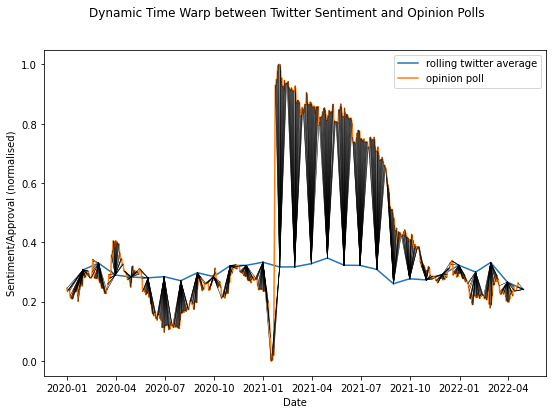

In [ ]:
plot_DTW(df_tweet_US, df_opinion_US, 'M', 2020,1,1)

In [ ]:
def DTW(df_tweet_US, df_opinion_US, period):
  term = 1
  if period == 'W':
    term = 7
  elif period == 'M':
    term = 30

  # type conversion
  df_tweet_US['created_at'] = pd.to_datetime(df_tweet_US['created_at'])
  USsentimentPerPeriod_Bert = df_tweet_US.resample(period, on='created_at')['sentiment_normalised'].mean()

  sentiment = USsentimentPerPeriod_Bert.reset_index()
  sentiment["time_int"] = (sentiment["created_at"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = term)).total_seconds()

  sentiment.drop(columns=["created_at"], inplace=True)
  sentiment.dropna(inplace=True)
  print(sentiment)

  df_opinion_US["date"] = pd.to_datetime(df_opinion_US["date"]) 
  mask = (df_opinion_US['date'] >= pd.Timestamp(2020, 1, 1))
  b = df_opinion_US.loc[mask]
  b["date"] = pd.to_datetime(b["date"]) 
  b["time_int"] = (b["date"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = term)).total_seconds()
  b.drop(columns=["opinion", "date"], inplace=True)
  print(b)

  sentiment = sentiment.to_numpy()
  b = b.to_numpy()

  # make the time_int on the left
  sentiment[:,[0, 1]] = sentiment[:,[1, 0]]
  b[:,[0, 1]] = b[:,[1, 0]]

  max_t = max(np.amax(sentiment[:, 0]), np.amax(b[:, 0]))
  print(max_t)

  distance, path = fastdtw(b, sentiment, dist=euclidean)
  print(distance)
# seconds to mins
  print(distance / 60)

  fig = plt.figure() 

  plt.plot((USsentimentPerPeriod_Bert.dropna()).index, sentiment[:,1], label = "rolling twitter average")
  plt.plot((df_opinion_US.reset_index().loc[mask])["date"], b[:,1], label = "opinion poll")


  index_a,index_b=zip(*path)
  for j, i in zip(index_a, index_b):
      x1=sentiment[i][0]
      y1=sentiment[i][1]
      x2=b[j][0]
      y2=b[j][1]
      
      x1 = pd.Timedelta(days = x1) + pd.Timestamp(2020, 1, 1)
      x2 = pd.Timedelta(days = x2) + pd.Timestamp(2020, 1, 1)

      plt.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=0.5)

  plt.legend()
  #plt.show()
  fig.set_size_inches(9, 6)
  plt.xlabel("Date")
  plt.ylabel("Sentiment/Approval (normalised)")
  fig.suptitle("Dynamic Time Warp between Twitter Sentiment and Opinion Polls")


     sentiment_normalised  time_int
0                0.370734       0.0
1                0.335815       1.0
2                0.301326       2.0
3                0.364346       3.0
4                0.265845       4.0
..                    ...       ...
825              0.235072     825.0
826              0.252558     826.0
827              0.290493     827.0
828              0.277198     828.0
829              0.292931     829.0

[829 rows x 2 columns]
     opinion_normalised  time_int
0              0.244969       0.0
1              0.234619       1.0
2              0.239812       2.0
3              0.239812       3.0
4              0.239812       4.0
..                  ...       ...
833            0.236585     836.0
834            0.236585     837.0
835            0.249110     838.0
836            0.250037     839.0
837            0.262960     840.0

[838 rows x 2 columns]
840.0
225.5870819312151
3.759784698853585


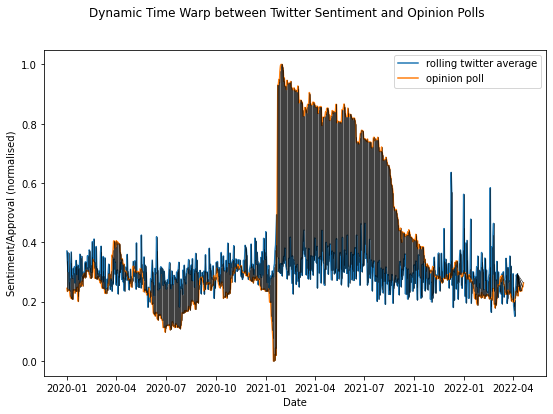

In [ ]:
DTW(df_tweet_US, df_opinion_US, 'D')

     sentiment_normalised    time_int
0                0.323976    0.571429
1                0.294978    1.571429
2                0.307647    2.571429
3                0.303743    3.571429
4                0.306335    4.571429
..                    ...         ...
114              0.240654  114.571429
115              0.280725  115.571429
116              0.277679  116.571429
117              0.241526  117.571429
118              0.249614  118.571429

[119 rows x 2 columns]
     opinion_normalised    time_int
0              0.244969    0.000000
1              0.234619    0.142857
2              0.239812    0.285714
3              0.239812    0.428571
4              0.239812    0.571429
..                  ...         ...
833            0.236585  119.428571
834            0.236585  119.571429
835            0.249110  119.714286
836            0.250037  119.857143
837            0.262960  120.000000

[838 rows x 2 columns]
120.0
296.021961879748
4.933699364662467


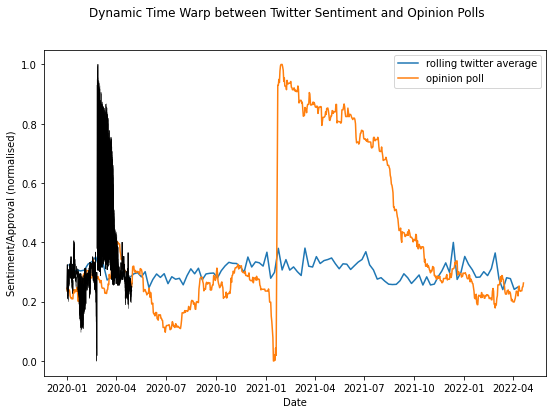

In [ ]:
DTW(df_tweet_US, df_opinion_US, 'W')

## Daily analysis DTW


In [ ]:
path = "drive/MyDrive/Colab Notebooks/ADS/USdata/"
df_tweet_US = pd.read_csv(path +"df_tweet_US.csv")
df_opinion_US = pd.read_csv(path + "df_opinion_US.csv")

# type conversion
df_tweet_US['created_at'] = pd.to_datetime(df_tweet_US['created_at'])
USsentimentPerDay_Bert = df_tweet_US.resample('D', on='created_at')['sentiment_normalised'].mean()

sentiment = USsentimentPerDay_Bert.reset_index()
sentiment["time_int"] = (sentiment["created_at"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = 1)).total_seconds()

sentiment.drop(columns=["created_at"], inplace=True)
sentiment.dropna(inplace=True)
print(sentiment)

df_opinion_US["date"] = pd.to_datetime(df_opinion_US["date"]) 
mask = (df_opinion_US['date'] >= pd.Timestamp(2020, 1, 1))
b = df_opinion_US.loc[mask]
b["date"] = pd.to_datetime(b["date"]) 
b["time_int"] = (b["date"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = 1)).total_seconds()
b.drop(columns=["opinion", "date"], inplace=True)
print(b)

sentiment = sentiment.to_numpy()
b = b.to_numpy()

     sentiment_normalised  time_int
0                0.370734       0.0
1                0.335815       1.0
2                0.301326       2.0
3                0.364346       3.0
4                0.265845       4.0
..                    ...       ...
825              0.235072     825.0
826              0.252558     826.0
827              0.290493     827.0
828              0.277198     828.0
829              0.292931     829.0

[829 rows x 2 columns]
     opinion_normalised  time_int
0              0.244969       0.0
1              0.234619       1.0
2              0.239812       2.0
3              0.239812       3.0
4              0.239812       4.0
..                  ...       ...
833            0.236585     836.0
834            0.236585     837.0
835            0.249110     838.0
836            0.250037     839.0
837            0.262960     840.0

[838 rows x 2 columns]


In [ ]:
# make the time_int on the left
sentiment[:,[0, 1]] = sentiment[:,[1, 0]]
b[:,[0, 1]] = b[:,[1, 0]]

max_t = max(np.amax(sentiment[:, 0]), np.amax(b[:, 0]))
print(max_t)

distance, path = fastdtw(b, sentiment, dist=euclidean)
print(distance)

print(distance / 60)

840.0
225.5870819312151
3.759784698853585


Text(0.5, 0.98, 'Dynamic Time Warp between Twitter Sentiment and Opinion Polls')

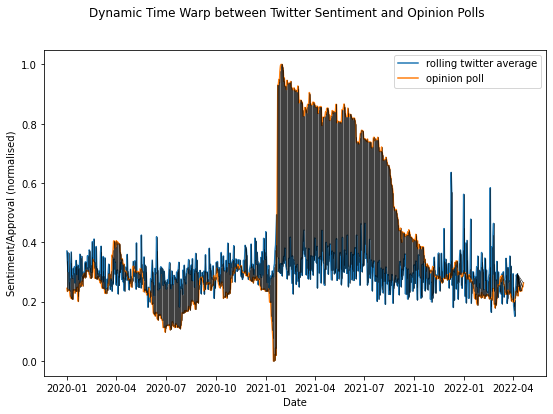

In [ ]:
fig = plt.figure() 

plt.plot((USsentimentPerDay_Bert.dropna()).index, sentiment[:,1], label = "rolling twitter average")
plt.plot((df_opinion_US.reset_index().loc[mask])["date"], b[:,1], label = "opinion poll")


index_a,index_b=zip(*path)
for j, i in zip(index_a, index_b):
    x1=sentiment[i][0]
    y1=sentiment[i][1]
    x2=b[j][0]
    y2=b[j][1]
    
    x1 = pd.Timedelta(days = x1) + pd.Timestamp(2020, 1, 1)
    x2 = pd.Timedelta(days = x2) + pd.Timestamp(2020, 1, 1)

    plt.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=0.5)

plt.legend()
#plt.show()
fig.set_size_inches(9, 6)
plt.xlabel("Date")
plt.ylabel("Sentiment/Approval (normalised)")
fig.suptitle("Dynamic Time Warp between Twitter Sentiment and Opinion Polls")


In [ ]:
plt.savefig('CAN_DTW.png', dpi=300)

<Figure size 432x288 with 0 Axes>

     sentiment_normalised    time_int
0                0.323976    0.571429
1                0.294978    1.571429
2                0.307647    2.571429
3                0.303743    3.571429
4                0.306335    4.571429
..                    ...         ...
114              0.240654  114.571429
115              0.280725  115.571429
116              0.277679  116.571429
117              0.241526  117.571429
118              0.249614  118.571429

[119 rows x 2 columns]
     opinion_normalised    time_int
0              0.239805    0.571429
1              0.215799    1.571429
2              0.236367    2.571429
3              0.241231    3.571429
4              0.272520    4.571429
..                  ...         ...
116            0.233407  116.571429
117            0.203876  117.571429
118            0.222964  118.571429
119            0.240837  119.571429
120            0.254036  120.571429

[121 rows x 2 columns]
120.57142857142857
24.515298080512274
0.40858830134187124


Text(0.5, 0.98, 'Dynamic Time Warp between Twitter Sentiment and Opinion Polls')

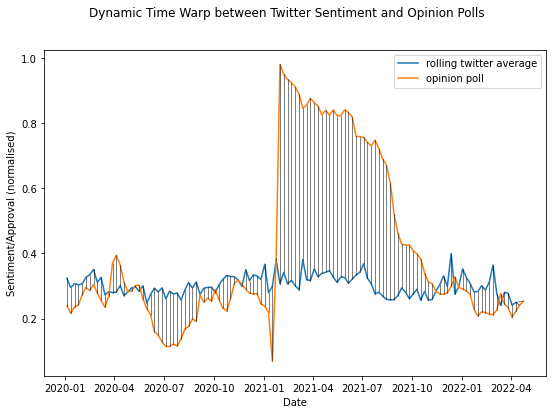

In [ ]:
# type conversion
df_tweet_US['created_at'] = pd.to_datetime(df_tweet_US['created_at'])
USsentimentPerPeriod_Bert = df_tweet_US.resample('W', on='created_at')['sentiment_normalised'].mean()
sentiment = USsentimentPerPeriod_Bert.reset_index()
sentiment["time_int"] = (sentiment["created_at"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = 7)).total_seconds()
sentiment.drop(columns=["created_at"], inplace=True)
sentiment.dropna(inplace=True)
print(sentiment)

USopinionPerPeriod_Bert = df_opinion_US.resample('W', on='date')['opinion_normalised'].mean().to_frame().reset_index()
USopinionPerPeriod_Bert["date"] = pd.to_datetime(USopinionPerPeriod_Bert["date"]) 
mask = (USopinionPerPeriod_Bert['date'] >= pd.Timestamp(2020, 1, 1))
b = USopinionPerPeriod_Bert.loc[mask]
b["date"] = pd.to_datetime(b["date"]) 
b["time_int"] = (b["date"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = term)).total_seconds()
b.drop(columns=["date"], inplace=True)
print(b)

sentiment = sentiment.to_numpy()
b = b.to_numpy()

# make the time_int on the left
sentiment[:,[0, 1]] = sentiment[:,[1, 0]]
b[:,[0, 1]] = b[:,[1, 0]]
max_t = max(np.amax(sentiment[:, 0]), np.amax(b[:, 0]))
print(max_t)
distance, path = fastdtw(b, sentiment, dist=euclidean)
print(distance)

#seconds to mins
print(distance / 60)

fig = plt.figure() 
plt.plot((USsentimentPerPeriod_Bert.dropna()).index, sentiment[:,1], label = "rolling twitter average")



plt.plot((USopinionPerPeriod_Bert.reset_index().loc[mask])["date"], b[:,1], label = "opinion poll")
index_a,index_b=zip(*path)
for j, i in zip(index_a, index_b):
    x1=sentiment[i][0]
    y1=sentiment[i][1]
    x2=b[j][0]
    y2=b[j][1]
    
    x1 = pd.Timedelta(weeks = x1) + pd.Timestamp(2020, 1, 1)
    x2 = pd.Timedelta(weeks = x2) + pd.Timestamp(2020, 1, 1)
    plt.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=0.5)
plt.legend()
#plt.show()
fig.set_size_inches(9, 6)
plt.xlabel("Date")
plt.ylabel("Sentiment/Approval (normalised)")
fig.suptitle("Dynamic Time Warp between Twitter Sentiment and Opinion Polls")

     sentiment_normalised   time_int
0                0.323976   0.133333
1                0.294978   0.366667
2                0.307647   0.600000
3                0.303743   0.833333
4                0.306335   1.066667
..                    ...        ...
114              0.240654  26.733333
115              0.280725  26.966667
116              0.277679  27.200000
117              0.241526  27.433333
118              0.249614  27.666667

[119 rows x 2 columns]
     opinion_normalised   time_int
0              0.244969   0.000000
1              0.234619   0.033333
2              0.239812   0.066667
3              0.239812   0.100000
4              0.239812   0.133333
..                  ...        ...
833            0.236585  27.866667
834            0.236585  27.900000
835            0.249110  27.933333
836            0.250037  27.966667
837            0.262960  28.000000

[838 rows x 2 columns]
28.0
171.64337280151338
2.860722880025223


Text(0.5, 0.98, 'Dynamic Time Warp between Twitter Sentiment and Opinion Polls')

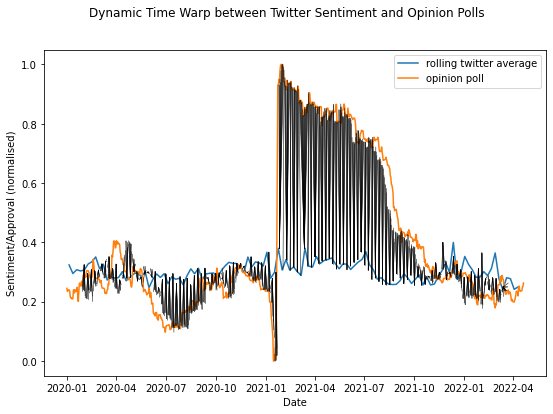

In [ ]:
# type conversion
df_tweet_US['created_at'] = pd.to_datetime(df_tweet_US['created_at'])
USsentimentPerPeriod_Bert = df_tweet_US.resample('W', on='created_at')['sentiment_normalised'].mean()
sentiment = USsentimentPerPeriod_Bert.reset_index()
sentiment["time_int"] = (sentiment["created_at"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = 30)).total_seconds()
sentiment.drop(columns=["created_at"], inplace=True)
sentiment.dropna(inplace=True)
print(sentiment)
df_opinion_US["date"] = pd.to_datetime(df_opinion_US["date"]) 
mask = (df_opinion_US['date'] >= pd.Timestamp(2020, 1, 1))
b = df_opinion_US.loc[mask]
b["date"] = pd.to_datetime(b["date"]) 
b["time_int"] = (b["date"] - pd.Timestamp(2020, 1, 1)).dt.total_seconds().astype(int) / (pd.Timedelta(days = 30)).total_seconds()
b.drop(columns=["opinion", "date"], inplace=True)
print(b)

sentiment = sentiment.to_numpy()
b = b.to_numpy()

# make the time_int on the left
sentiment[:,[0, 1]] = sentiment[:,[1, 0]]
b[:,[0, 1]] = b[:,[1, 0]]
max_t = max(np.amax(sentiment[:, 0]), np.amax(b[:, 0]))
print(max_t)
distance, path = fastdtw(b, sentiment, dist=euclidean)
print(distance)

#seconds to mins
print(distance / 60)

fig = plt.figure() 
plt.plot((USsentimentPerPeriod_Bert.dropna()).index, sentiment[:,1], label = "rolling twitter average")
plt.plot((df_opinion_US.reset_index().loc[mask])["date"], b[:,1], label = "opinion poll")
index_a,index_b=zip(*path)
for j, i in zip(index_a, index_b):
    x1=sentiment[i][0]
    y1=sentiment[i][1]
    x2=b[j][0]
    y2=b[j][1]
    
    x1 = pd.Timedelta(weeks = 4 * x1 + 4) + pd.Timestamp(2020, 1, 1)
    x2 = pd.Timedelta(weeks = 4 * x2 + 4) + pd.Timestamp(2020, 1, 1)
    plt.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=0.5)
plt.legend()
#plt.show()
fig.set_size_inches(9, 6)
plt.xlabel("Date")
plt.ylabel("Sentiment/Approval (normalised)")
fig.suptitle("Dynamic Time Warp between Twitter Sentiment and Opinion Polls")